<a href="https://colab.research.google.com/github/PaulToronto/TensorFlow_Tutorials/blob/main/2_Keras_Basic_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras - Basic image classification

- https://tinyurl.com/2rj37rec

## Imports

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.17.0'

## The Fashion MNIST dataset

This dataset contains contains 70,000 grayscale images in 10 categories. It is very similar to the MNIST dataset.

In [3]:
# load the data
fashion_mnist = tf.keras.datasets.fashion_mnist

test = fashion_mnist.load_data()

In [4]:
type(test), len(test), len(test[0]), len(test[1])

(tuple, 2, 2, 2)

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
labels = np.unique(train_labels)
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Visualize Fashion MNIST

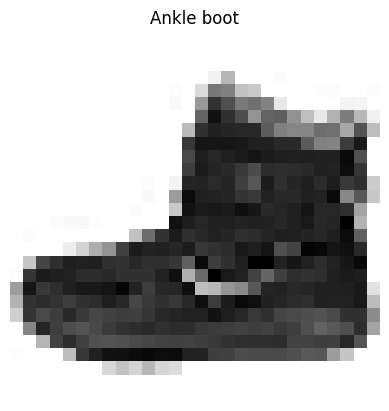

In [9]:
def plot_fashion(image_data, label_data):
    image = image_data
    plt.imshow(image, cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(class_names[label_data])

plot_fashion(train_images[0], train_labels[0])

In [10]:
len(train_images[:50])

50

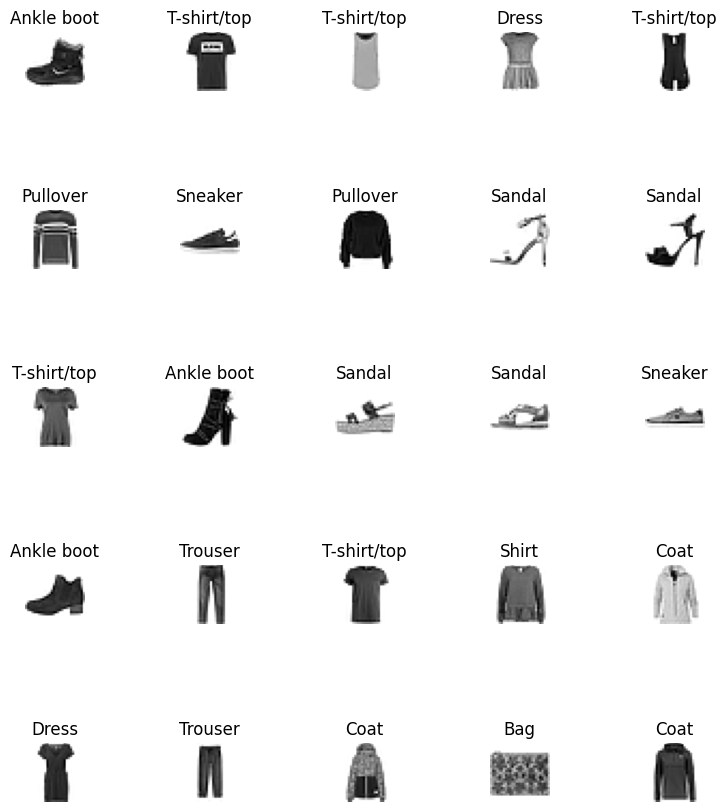

In [11]:
plt.figure(figsize=(10, 10))
for index, image_data in enumerate(train_images[:25]):
    plt.subplot(5, 5, index+1)
    plot_fashion(image_data, train_labels[index])

plt.subplots_adjust(wspace=0, hspace=2)

## Preprocess the data

The pixels values fall in the range of 0 to 255. These should be scaled before feeding them to the neural network model

In [12]:
train_images.min(), train_images.max(), test_images.min(), test_images.max()

(0, 255, 0, 255)

In [13]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [14]:
train_images.min(), train_images.max(), test_images.min(), test_images.max()

(0.0, 1.0, 0.0, 1.0)

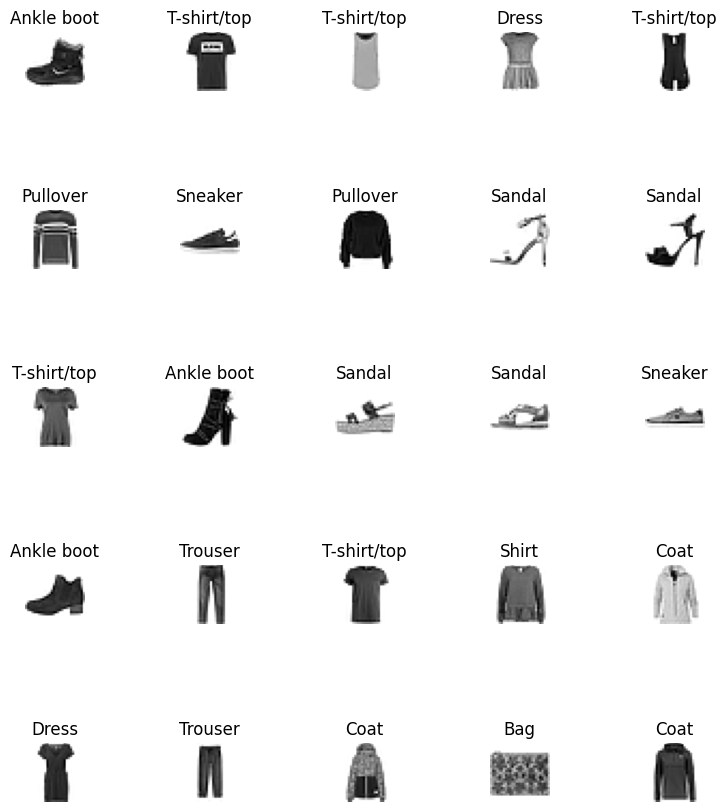

In [15]:
# data viz still works
plt.figure(figsize=(10, 10))
for index, image_data in enumerate(train_images[:25]):
    plt.subplot(5, 5, index+1)
    plot_fashion(image_data, train_labels[index])

plt.subplots_adjust(wspace=0, hspace=2)

## Build the model

### Set up the layers

The tutorial uses the following code, but it generates a warning. My code below gets rid of that warning.

```python
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# UserWarning: Do not pass an `input_shape`/`input_dim` argument to
#.  a layer. When using Sequential models, prefer using an
#. `Input (shape)` object as the first layer in the model instead.
```

In [16]:
model = tf.keras.models.Sequential([

    # input layer has a node for each feature, 784 nodes
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),

    # hidden layer
    tf.keras.layers.Dense(128, activation='relu'),

    # output layer has a node for each class
    tf.keras.layers.Dense(10)
])

model

<Sequential name=sequential, built=True>

In [17]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

- Most of deep learning consists of chaining together simple layers
    - The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two dimensional array, `(28, 28)` to a one-dimensional array, `(None, 784)`
    - The next two layers are `tf.keras.layers.Dense` layers. They are densely connected (fully connected), neural layers
        - The first of these has 128 nodes
        - The second of these returns a logits array with a length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes

## Compile the model

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

- `optimizer`: this is how the model is updated based on the data it sees and its loss function
- `loss`: the loss function measures how accurate teh model is during training. You want to minimize this function to "steer" the model in the right direction
- `metrics`: used to monitor the training and testing steps

## Train the model

4 steps:

1. Feed the model
2. Evaluate accuracy
3. Make predictions
4. Vefify predictions

### 1. Feed the model

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7807 - loss: 0.6243
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8613 - loss: 0.3836
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8765 - loss: 0.3365
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8873 - loss: 0.3077
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8928 - loss: 0.2948
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8964 - loss: 0.2786
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8999 - loss: 0.2710
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9072 - loss: 0.2476
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9097 - loss: 0.2418
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9103 - loss: 0.2358


### 2. Evaluate accuracy

- Use the test set for this

In [21]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.8793 - loss: 0.3362


In [22]:
test_loss

0.3361971080303192

In [23]:
test_accuracy

0.8792999982833862

In [24]:
# compare this to the accuracy on the training set:
train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=2)

1875/1875 - 3s - 1ms/step - accuracy: 0.9154 - loss: 0.2243


In [25]:
train_accuracy

0.9154499769210815

The test accuracy is a little less than the train accuracy. This gap represents **overfitting**.

- overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on training data
- an overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts teh performance of the model on the new data

### 3. Make predictions

- We need to attach a `softmax` layer to the model to convert the **logits** to probabilities

In [26]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [27]:
probability_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 10)                  │         101,770 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ ?                           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
predictions

array([[1.26554573e-06, 7.73764455e-11, 1.91787297e-08, ...,
        7.15250671e-02, 2.48911675e-07, 9.20219719e-01],
       [5.93687309e-06, 8.80300954e-12, 9.96414363e-01, ...,
        8.26958213e-16, 2.33146249e-08, 3.36070724e-16],
       [1.28325865e-08, 9.99999940e-01, 4.09556980e-12, ...,
        1.89790824e-27, 3.31241090e-10, 9.10079481e-24],
       ...,
       [2.78300704e-05, 1.28814130e-11, 5.41173686e-05, ...,
        2.78918028e-10, 9.99692678e-01, 9.97717950e-11],
       [8.28140514e-07, 9.99798536e-01, 1.41318850e-08, ...,
        5.27981725e-15, 1.57758237e-07, 6.61629605e-13],
       [2.03701643e-06, 8.11715695e-10, 2.73779108e-07, ...,
        6.94631832e-04, 2.84172838e-05, 1.86501359e-06]], dtype=float32)

### 3. Verify predictions

In [30]:
# prediction
class_names[predictions[0].argmax()]

'Ankle boot'

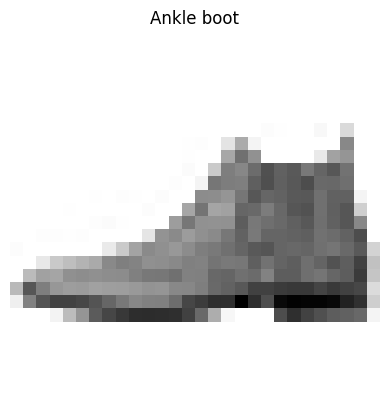

In [31]:
# image and true label
plot_fashion(test_images[0], test_labels[0])

In [32]:
def plot_image(i, prediction_array, true_labels, images):
    prediction, true_label, image = prediction_array[i], true_labels[i], images[i]
    plt.axis('off')

    plt.imshow(image, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'

    plt.title('{} {:2.0f}% (Truth: {})'.format(
        class_names[predicted_label],
        100 * np.max(prediction),
        class_names[true_label]),
               color=color)

def plot_value_array(i, prediction_array, true_labels):
    prediction, true_label = prediction_array[i], true_labels[i]
    plt.grid=False
    plt.xticks([])
    plt.yticks(ticks=range(10), labels=class_names)

    bar_container = plt.barh(class_names, prediction)
    plt.xlim([0, 1])
    predicted_label = np.argmax(prediction)


    bar_container[predicted_label].set_color('red')
    bar_container[predicted_label].set_label('Predicted label')
    bar_container[true_label].set_color('blue')
    bar_container[true_label].set_label('True label')

    plt.legend()

def plot_image_prediction(i, prediction_array, true_labels, images):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_image(i, prediction_array, true_labels, images)
    plt.subplot(1, 2, 2)
    plot_value_array(i, prediction_array, true_labels)
    plt.show()

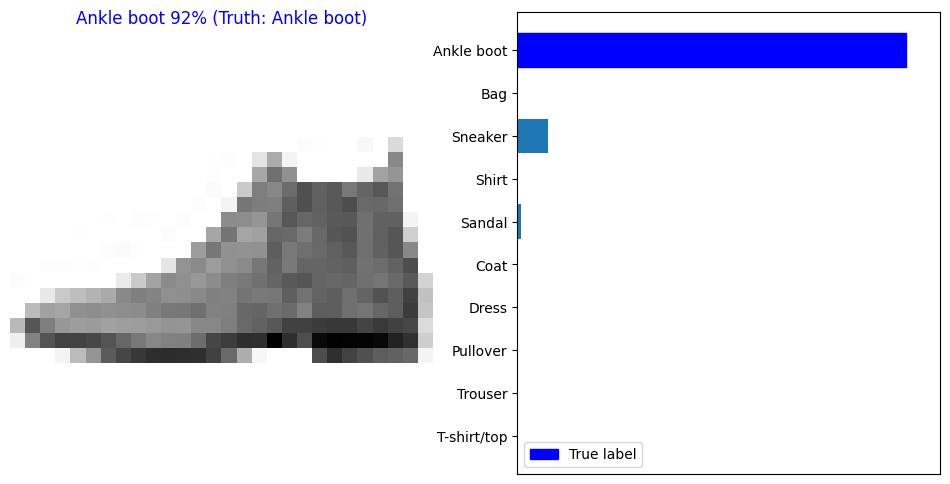

In [33]:
plot_image_prediction(0, predictions, test_labels, test_images)

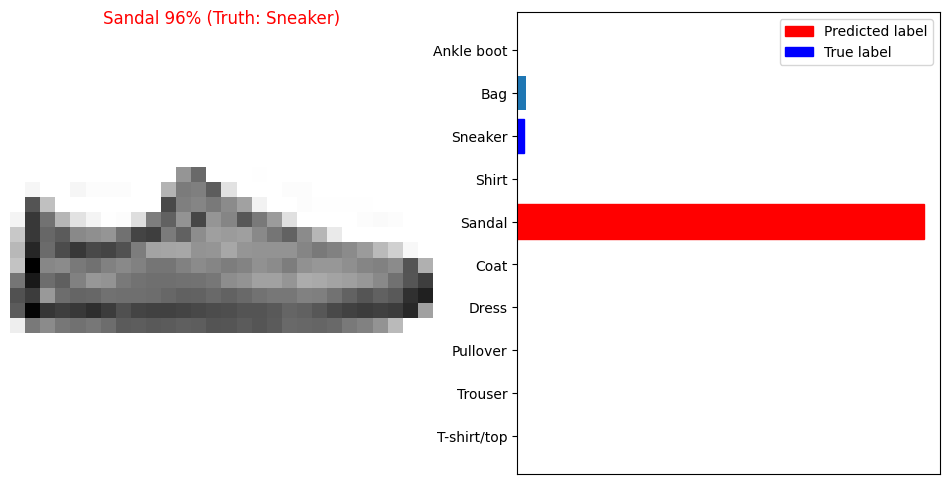

In [34]:
plot_image_prediction(12, predictions, test_labels, test_images)

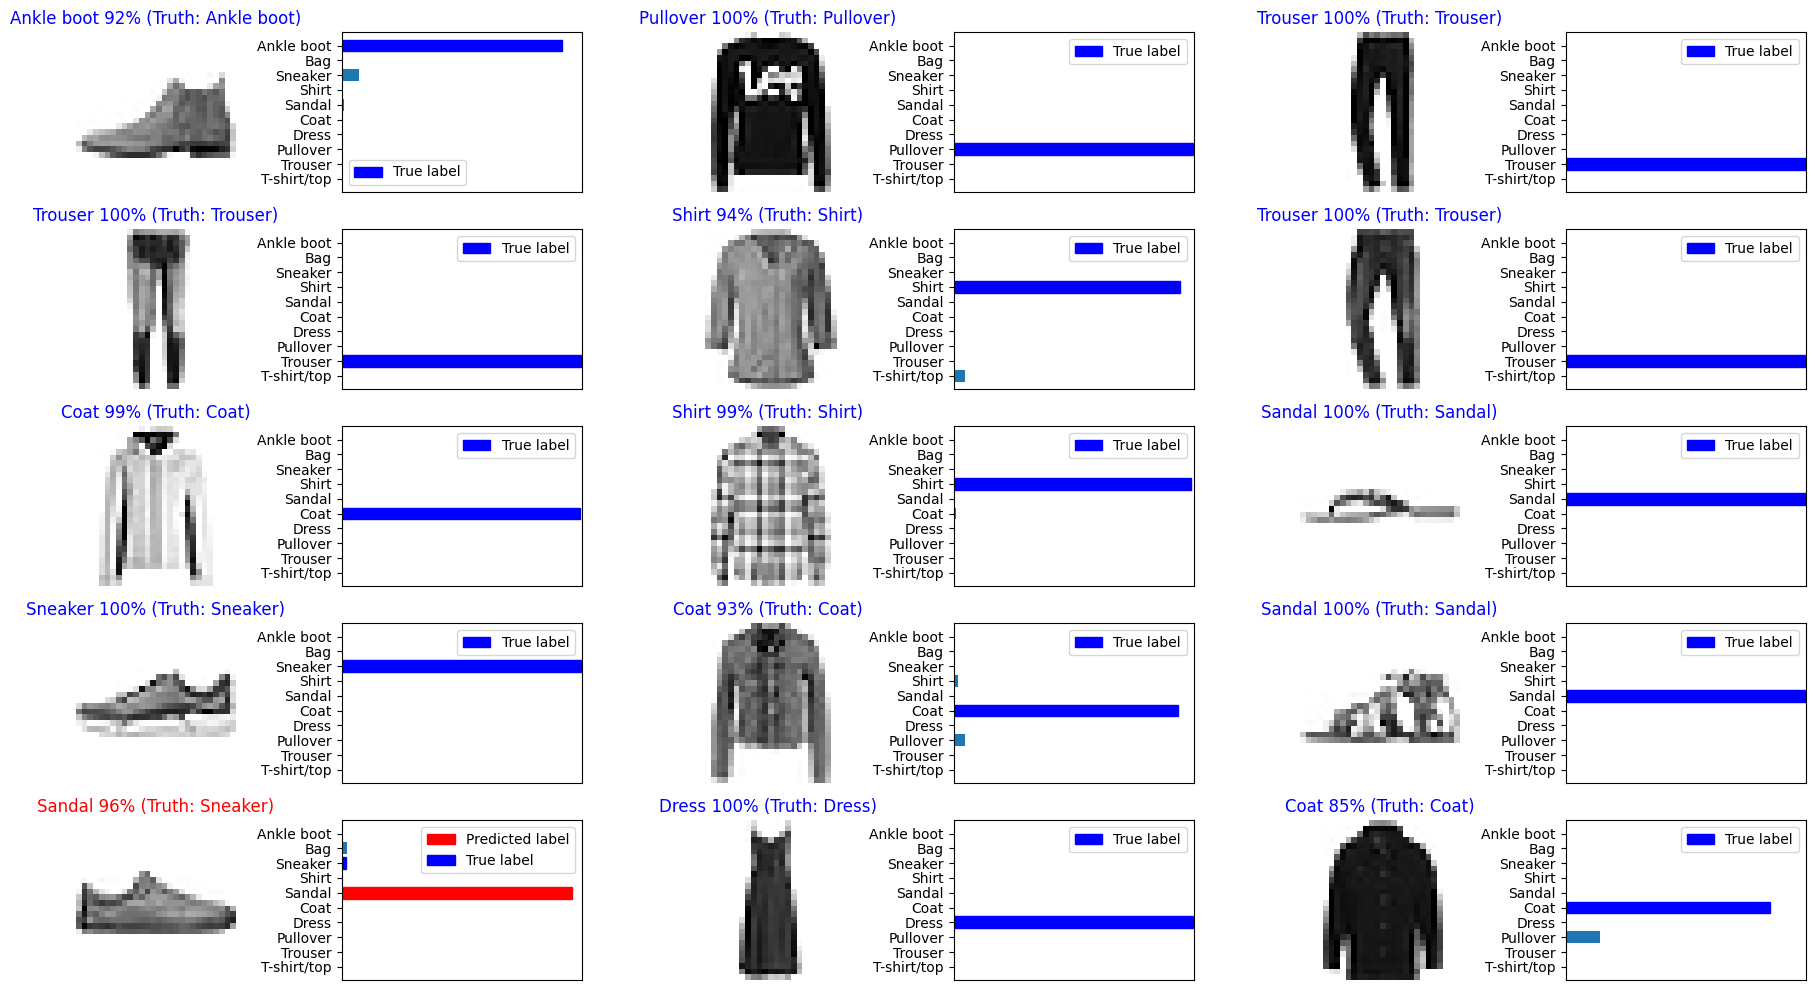

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 3 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()

## Use the trained model

- Here we used the trained model to make a prediction about a single image

In [36]:
img = test_images[1]

img.shape

(28, 28)

`tf.keras` models are optimized to make predictions on a *batch*, or collection of samples at once. Even if you are using only a single image, you need to add it to a list.

```python
probability_model.predict(img)

# ValueError: Exception encountered when calling Sequential.call().

#Cannot take the length of shape with unknown rank.
```

In [37]:
(np.expand_dims(img, 0).shape,
 np.expand_dims(img, 1).shape,
 np.expand_dims(img, 2).shape)

((1, 28, 28), (28, 1, 28), (28, 28, 1))

In [38]:
prediction_single = probability_model.predict(np.expand_dims(img, 0))
prediction_single

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[5.9368945e-06, 8.8030755e-12, 9.9641418e-01, 5.6885952e-08,
        9.9229615e-04, 8.5713670e-15, 2.5874919e-03, 8.2696441e-16,
        2.3314621e-08, 3.3607324e-16]], dtype=float32)

In [39]:
# prediction
class_names[prediction_single.argmax()]

'Pullover'

In [40]:
# actual label
class_names[test_labels[1]]

'Pullover'